In [5]:
import matplotlib.pyplot as plt
import numpy as np


In [6]:
class dot:
    def __init__(self, x:int, y:int):
        self.x = x
        self.y = y
        
    def __str__(self):
        return f"dot({self.x}, {self.y})"
        
        
def get_dots_lists(input_dots):
    x_list = []
    y_list = []
    
    for dot in input_dots:
        x_list.append(dot.x)
        y_list.append(dot.y)
        
    return x_list, y_list
    


In [7]:
enter_dots = [
    dot(1, 1),
    dot(2, 2)
]

move_dot = dot(1.7, 1.2)

In [8]:
class line:
    def __init__(self, k, b):
        self.k = k
        self.b = b
    
    def __init__(self, d1:dot, d2:dot):
        self.k, self.b = self.cal_k_b(d1, d2)
        
    def y(self, x:float):
        return self.k * x + self.b
    
    def len(self, x1:float, x2:float):
        y1 = self.y(x1)
        y2 = self.y(x2)
        
        return np.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
        
    def cal_k_b(self, d1:dot, d2:dot):
        k = (d1.y - d2.y) / (d1.x - d2.x)
        b = d2.y - d2.x * k
        return k, b

class final_line(line):
    def __init__(self, d1, d2):
        self.k, self.b = self.cal_k_b(d1, d2)
        self.d1 = d1
        self.d2 = d2
    
    def is_x_inside(self, x:float) ->bool:
        if (((self.d1.x <= x)and(x <= self.d2.x)) or ((self.d2.x <= x)and(x <= self.d1.x))):
            return True
        else:
            return False
    
    def is_y_inside(self, y:float) ->bool:
        if (((self.d1.y <= y)and(y <= self.d2.y)) or ((self.d2.y <= y)and(y <= self.d1.y))):
            return True
        else:
            return False
    
    def is_dot_inside(self, d:dot) -> bool:    
        return (self.is_x_inside(d.x) and self.is_y_inside(d.y))
    
    def len(self):
        return np.sqrt( (self.d1.x - self.d2.x)**2 + (self.d1.y - self.d2.y)**2 )
    
    def get_coo_by_per(self, per:float):
        line_len = self.len()
        
        line_per = line_len * per
        
        x_len = line_per / (np.sqrt(1 + self.k**2))
        
        y_len = x_len * self.k
        
        
        
        #print("k:",self.k)
        
        return dot(self.d1.x + x_len, self.d1.y + y_len)
        
        
    

In [9]:
class bez_1:
    def __init__(self, sd:dot, ed:dot, vd:dot):
        self.sd = sd
        self.ed = ed
        self.vd = vd
        
        self.fline_1 = final_line(sd, vd)
        self.fline_2 = final_line(vd, ed)
        
    def get_bez_xy_step(self, step:int, ax):
        
        x = []
        y = []
        
        for i in np.arange(0, 1.1, step):
        #for i in range(0, 100, 10):
            tem_d1 = self.fline_1.get_coo_by_per(i)
            tem_d2 = self.fline_2.get_coo_by_per(i)
            
            tem_line = final_line(tem_d1, tem_d2)
            
            x.append(tem_line.get_coo_by_per(i).x)
            y.append(tem_line.get_coo_by_per(i).y)
            ax.plot([tem_line.d1.x, tem_line.d2.x], [tem_line.d1.y, tem_line.d2.y], color = "green")
        
        return x, y
        

In [11]:
# fig, ax = plt.subplots()


# dots_x, dots_y = get_dots_lists(enter_dots)

# # Start dots
# ax.plot(dots_x, dots_y, 'o')

# # Moveable dot
# #ax.plot(move_dot.x, move_dot.y, 'o', color = "orange")


# # Test dots
# #test_dot_1 = get_linear_coo_by_percent(enter_dots[0], move_dot, 0.8)
# #ax.plot(test_dot_1.x, test_dot_1.y, 'o', color = "purple")

# fl1 = final_line(enter_dots[0], move_dot)
# fl2 = final_line(move_dot, enter_dots[1])

# pers = 0.5

# fl_dot1 = fl1.get_coo_by_per(pers)
# fl_dot2 = fl2.get_coo_by_per(pers)

# flm = final_line(fl_dot1, fl_dot2)
# fl_dotm = flm.get_coo_by_per(pers)

# #ax.plot(fl_dot1.x, fl_dot1.y, 'o', color = "green")
# #ax.plot(fl_dot2.x, fl_dot2.y, 'o', color = "green")
# #ax.plot(fl_dotm.x, fl_dotm.y, 'o', color = "green")

# #ax.plot([fl1.d1.x, fl1.d2.x], [fl1.d1.y, fl1.d2.y])
# #ax.plot([fl2.d1.x, fl2.d2.x], [fl2.d1.y, fl2.d2.y])
# #ax.plot([flm.d1.x, flm.d2.x], [flm.d1.y, flm.d2.y])

# #bez = bez_1(enter_dots, enter_dots[1], move_dot)
# #bez_x, bez_y = bez.get_bez_xy_step(0.10)
# #ax.plot(bez_x, bez_y)



# move_dot2 = dot(move_dot.x + 0.5, move_dot.y + 0.5)
# bez = bez_1(enter_dots, enter_dots[1], move_dot2)
# ax.plot(move_dot2.x, move_dot2.y, 'o', color = "red")
# bez_x, bez_y = bez.get_bez_xy_step(0.2,ax)
# ax.plot(bez_x, bez_y)


# ax.plot([bez.fline_1.d1.x, bez.fline_1.d2.x], [bez.fline_1.d1.y, bez.fline_1.d2.y])
# ax.plot([bez.fline_2.d1.x, bez.fline_2.d2.x], [bez.fline_2.d1.y, bez.fline_2.d2.y])


# str(fl1.d1), str(fl1.d2)
# fl1.len()

In [12]:
print(np.sqrt(0.019999999999999993**2 + 0.06999999999999999**2))

0.07280109889280517


!!!!!!!!!!!


In [13]:
xy = [
    (0, 0), (8e-06, 0.001184), (6.4e-05, 0.004672), (0.000216, 0.010368), (0.000512, 0.018176), (0.001, 0.028), (0.001728, 0.039744), (0.002744, 0.053312), (0.004096, 0.068608), (0.005832, 0.085536), (0.008, 0.104), (0.010648, 0.123904), (0.013824, 0.145152), (0.017576, 0.167648), (0.021952, 0.191296), (0.027, 0.216), (0.032768, 0.241664), (0.039304, 0.268192), (0.046656, 0.295488), (0.054872, 0.323456), (0.064, 0.352), (0.074088, 0.381024), (0.085184, 0.410432), (0.097336, 0.440128), (0.110592, 0.470016), (0.125, 0.5), (0.140608, 0.529984), (0.157464, 0.559872), (0.175616, 0.589568), (0.195112, 0.618976), (0.216, 0.648), (0.238328, 0.676544), (0.262144, 0.704512), (0.287496, 0.731808), (0.314432, 0.758336), (0.343, 0.784), (0.373248, 0.808704), (0.405224, 0.832352), (0.438976, 0.854848), (0.474552, 0.876096), (0.512, 0.896), (0.551368, 0.914464), (0.592704, 0.931392), (0.636056, 0.946688), (0.681472, 0.960256), (0.729, 0.972), (0.778688, 0.981824), (0.830584, 0.989632), (0.884736, 0.995328), (0.941192, 0.998816), (1, 1)
]

x = []
y = []
for i in xy: 
    x.append(i[0])
    y.append(i[1])    

In [14]:
n = 3
vert = [(0.0, 0.0), (0.0, 1.0), (1.0, 1.0)]


def get_single_point(t:float):
    x = 0;
    y = 0;
    z = 0;
    
    for i in range(1, n+1):
        x += np.math.factorial(n) / np.math.factorial(i) / np.math.factorial(n-i) * (1 - t)**(n-i) * t**i * vert[i-1][0]
        y += np.math.factorial(n) / np.math.factorial(i) / np.math.factorial(n-i) * (1 - t)**(n-i) * t**i * vert[i-1][1]
    
    return (x,y)

In [15]:
v = []
for i in range(0, 50):
    v.append(get_single_point(1/50*i))

In [16]:
x = []
y = []
for i in v: 
    x.append(i[0])
    y.append(i[1]) 

In [17]:
def make_box(box_c):
    bmin = box_c[0]
    bmax = box_c[1]
    
    x = [bmin[0],bmin[0],bmax[0],bmax[0],bmin[0]]
    y = [bmin[1],bmax[1],bmax[1],bmin[1],bmin[1]]
    
    return (x,y)



In [18]:
xy1 = [
    #(0, 0), (0.0004, 0.0396), (0.0016, 0.0784), (0.0036, 0.1164), (0.0064, 0.1536), (0.01, 0.19), (0.0144, 0.2256), (0.0196, 0.2604), (0.0256, 0.2944), (0.0324, 0.3276), (0.04, 0.36), (0.0484, 0.3916), (0.0576, 0.4224), (0.0676, 0.4524), (0.0784, 0.4816), (0.09, 0.51), (0.1024, 0.5376), (0.1156, 0.5644), (0.1296, 0.5904), (0.1444, 0.6156), (0.16, 0.64), (0.1764, 0.6636), (0.1936, 0.6864), (0.2116, 0.7084), (0.2304, 0.7296), (0.25, 0.75), (0.2704, 0.7696), (0.2916, 0.7884), (0.3136, 0.8064), (0.3364, 0.8236), (0.36, 0.84), (0.3844, 0.8556), (0.4096, 0.8704), (0.4356, 0.8844), (0.4624, 0.8976), (0.49, 0.91), (0.5184, 0.9216), (0.5476, 0.9324), (0.5776, 0.9424), (0.6084, 0.9516), (0.64, 0.96), (0.6724, 0.9676), (0.7056, 0.9744), (0.7396, 0.9804), (0.7744, 0.9856), (0.81, 0.99), (0.8464, 0.9936), (0.8836, 0.9964), (0.9216, 0.9984), (0.9604, 0.9996), (1, 1)
   #(70, 250), (66.9444, 240.767), (64.4444, 231.733), (62.5, 222.9), (61.1111, 214.267), (60.2778, 205.833), (60, 197.6), (60.2778, 189.567), (61.1111, 181.733), (62.5, 174.1), (64.4444, 166.667), (66.9444, 159.433), (70, 152.4), (73.6111, 145.567), (77.7778, 138.933), (82.5, 132.5), (87.7778, 126.267), (93.6111, 120.233), (100, 114.4), (106.944, 108.767), (114.444, 103.333), (122.5, 98.1), (131.111, 93.0667), (140.278, 88.2333), (150, 83.6), (160.278, 79.1667), (171.111, 74.9333), (182.5, 70.9), (194.444, 67.0667), (206.944, 63.4333), (220, 60),
   #(10, 250), (12.5618, 231.929), (17.4301, 215.031), (24.385, 199.277), (33.2138, 184.639), (43.7114, 171.088), (55.68, 158.592), (68.9292, 147.12), (83.2761, 136.639), (98.545, 127.117), (114.568, 118.519), (131.184, 110.809), (148.24, 103.952), (165.59, 97.9111), (183.095, 92.6483), (200.625, 88.125), (218.055, 84.3016), (235.27, 81.1377), (252.16, 78.592), (268.624, 76.6222), (284.568, 75.1852), (299.905, 74.237), (314.556, 73.7327), (328.449, 73.6266), (341.52, 73.872), (353.711, 74.4213), (364.974, 75.2261), (375.265, 76.237), (384.55, 77.4039), (392.802, 78.6755), (400, 80)
   #(10, 250), (11.6237, 236.299), (14.4563, 223.191), (18.44, 210.67), (23.517, 198.729), (29.6296, 187.361), (36.72, 176.56), (44.7304, 166.319), (53.603, 156.631), (63.28, 147.49), (73.7037, 138.889), (84.8163, 130.821), (96.56, 123.28), (108.877, 116.259), (121.71, 109.751), (135, 103.75), (148.69, 98.2489), (162.723, 93.2411), (177.04, 88.72), (191.584, 84.6789), (206.296, 81.1111), (221.12, 78.01), (235.997, 75.3689), (250.87, 73.1811), (265.68, 71.44), (280.37, 70.1389), (294.883, 69.2711), (309.16, 68.83), (323.144, 68.8089), (336.776, 69.2011), (350, 70)
   #(0, 0, 0), (7.86644, 5.05544, 0), (15.7765, 9.76223, 0), (23.7301, 14.1204, 0), (31.7272, 18.1298, 0), (39.768, 21.7907, 0), (47.8523, 25.1029, 0), (55.9803, 28.0664, 0), (64.1518, 30.6813, 0), (72.3669, 32.9475, 0), (80.6255, 34.8651, 0), (88.9278, 36.434, 0), (97.2736, 37.6543, 0), (105.663, 38.5259, 0), (114.096, 39.0489, 0), (122.573, 39.2232, 0), (131.093, 39.0489, 0), (139.656, 38.5259, 0), (148.264, 37.6543, 0), (156.915, 36.434, 0), (165.609, 34.8651, 0), (174.347, 32.9475, 0), (183.129, 30.6813, 0), (191.954, 28.0664, 0), (200.823, 25.1029, 0), (209.735, 21.7907, 0), (218.691, 18.1298, 0), (227.691, 14.1204, 0), (236.734, 9.76223, 0), (245.821, 5.05544, 0), (254.951, 0, 0),
   #(0, 150, 30), (6.72222, 156.5, 31.3333), (13.5556, 162.667, 32.6667), (20.5, 168.5, 34), (27.5556, 174, 35.3333), (34.7222, 179.167, 36.6667), (42, 184, 38), (49.3889, 188.5, 39.3333), (56.8889, 192.667, 40.6667), (64.5, 196.5, 42), (72.2222, 200, 43.3333), (80.0556, 203.167, 44.6667), (88, 206, 46), (96.0556, 208.5, 47.3333), (104.222, 210.667, 48.6667), (112.5, 212.5, 50), (120.889, 214, 51.3333), (129.389, 215.167, 52.6667), (138, 216, 54), (146.722, 216.5, 55.3333), (155.556, 216.667, 56.6667), (164.5, 216.5, 58), (173.556, 216, 59.3333), (182.722, 215.167, 60.6667), (192, 214, 62), (201.389, 212.5, 63.3333), (210.889, 210.667, 64.6667), (220.5, 208.5, 66), (230.222, 206, 67.3333), (240.056, 203.167, 68.6667), (250, 200, 70)
   #(0, 0, 0), (6.72222, 6.5, 1.33333), (13.5556, 12.6667, 2.66667), (20.5, 18.5, 4), (27.5556, 24, 5.33333), (34.7222, 29.1667, 6.66667), (42, 34, 8), (49.3889, 38.5, 9.33333), (56.8889, 42.6667, 10.6667), (64.5, 46.5, 12), (72.2222, 50, 13.3333), (80.0556, 53.1667, 14.6667), (88, 56, 16), (96.0556, 58.5, 17.3333), (104.222, 60.6667, 18.6667), (112.5, 62.5, 20), (120.889, 64, 21.3333), (129.389, 65.1667, 22.6667), (138, 66, 24), (146.722, 66.5, 25.3333), (155.556, 66.6667, 26.6667), (164.5, 66.5, 28), (173.556, 66, 29.3333), (182.722, 65.1667, 30.6667), (192, 64, 32), (201.389, 62.5, 33.3333), (210.889, 60.6667, 34.6667), (220.5, 58.5, 36), (230.222, 56, 37.3333), (240.056, 53.1667, 38.6667), (250, 50, 40)
   (0.2, 1.5, 0), (0.303374, 1.37277, 0), (0.406306, 1.25984, 0), (0.508352, 1.16087, 0), (0.60907, 1.07553, 0), (0.708016, 1.00349, 0), (0.804748, 0.944405, 0), (0.898823, 0.897958, 0), (0.989799, 0.863812, 0), (1.07723, 0.841633, 0), (1.16068, 0.831092, 0), (1.2397, 0.831854, 0), (1.31385, 0.843589, 0), (1.38268, 0.865964, 0), (1.44576, 0.898647, 0), (1.50264, 0.941306, 0), (1.55287, 0.993608, 0), (1.59602, 1.05522, 0), (1.63165, 1.12581, 0), (1.6593, 1.20506, 0), (1.67854, 1.29261, 0), (1.68892, 1.38815, 0), (1.69, 1.49134, 0), (1.68134, 1.60185, 0), (1.6625, 1.71934, 0), (1.63302, 1.8435, 0), (1.59248, 1.97397, 0), (1.54042, 2.11043, 0), (1.47641, 2.25255, 0), (1.4, 2.4, 0)
]

xy2 = [
    #(0, 2), (0.04, 1.96), (0.08, 1.92), (0.12, 1.88), (0.16, 1.84), (0.2, 1.8), (0.24, 1.76), (0.28, 1.72), (0.32, 1.68), (0.36, 1.64), (0.4, 1.6), (0.44, 1.56), (0.48, 1.52), (0.52, 1.48), (0.56, 1.44), (0.6, 1.4), (0.64, 1.36), (0.68, 1.32), (0.72, 1.28), (0.76, 1.24), (0.8, 1.2), (0.84, 1.16), (0.88, 1.12), (0.92, 1.08), (0.96, 1.04), (1, 1), (1.04, 0.96), (1.08, 0.92), (1.12, 0.88), (1.16, 0.84), (1.2, 0.8), (1.24, 0.76), (1.28, 0.72), (1.32, 0.68), (1.36, 0.64), (1.4, 0.6), (1.44, 0.56), (1.48, 0.52), (1.52, 0.48), (1.56, 0.44), (1.6, 0.4), (1.64, 0.36), (1.68, 0.32), (1.72, 0.28), (1.76, 0.24), (1.8, 0.2), (1.84, 0.16), (1.88, 0.12), (1.92, 0.08), (1.96, 0.0400001), (2, 0)
    #(0, 2), (0.04, 1.96), (0.08, 1.92), (0.12, 1.88), (0.16, 1.84), (0.2, 1.8), (0.24, 1.76), (0.28, 1.72), (0.32, 1.68), (0.36, 1.64), (0.4, 1.6), (0.44, 1.56), (0.48, 1.52), (0.52, 1.48), (0.56, 1.44), (0.6, 1.4), (0.64, 1.36), (0.68, 1.32), (0.72, 1.28), (0.76, 1.24), (0.8, 1.2), (0.84, 1.16), (0.88, 1.12), (0.92, 1.08), (0.96, 1.04), (1, 1), (1.04, 0.96), (1.08, 0.92), (1.12, 0.88), (1.16, 0.84), (1.2, 0.8), (1.24, 0.76), (1.28, 0.72), (1.32, 0.68), (1.36, 0.64), (1.4, 0.6), (1.44, 0.56), (1.48, 0.52), (1.52, 0.48), (1.56, 0.44), (1.6, 0.4), (1.64, 0.36), (1.68, 0.32), (1.72, 0.28), (1.76, 0.24), (1.8, 0.2), (1.84, 0.16), (1.88, 0.12), (1.92, 0.08), (1.96, 0.0400001), (2, 0)
    #(0, 0), (0.00111111, 0.0655556), (0.00444445, 0.128889), (0.01, 0.19), (0.0177778, 0.248889), (0.0277778, 0.305556), (0.04, 0.36), (0.0544445, 0.412222), (0.0711111, 0.462222), (0.09, 0.51), (0.111111, 0.555556), (0.134444, 0.598889), (0.16, 0.64), (0.187778, 0.678889), (0.217778, 0.715556), (0.25, 0.75), (0.284444, 0.782222), (0.321111, 0.812222), (0.36, 0.84), (0.401111, 0.865556), (0.444444, 0.888889), (0.49, 0.91), (0.537778, 0.928889), (0.587778, 0.945556), (0.64, 0.96), (0.694444, 0.972222), (0.751111, 0.982222), (0.81, 0.99), (0.871111, 0.995556), (0.934445, 0.998889), (1, 1)
    #(0, 0), (0.00111111, 0.0655556), (0.00444445, 0.128889), (0.01, 0.19), (0.0177778, 0.248889), (0.0277778, 0.305556), (0.04, 0.36), (0.0544445, 0.412222), (0.0711111, 0.462222), (0.09, 0.51), (0.111111, 0.555555), (0.134444, 0.598889), (0.16, 0.64), (0.187778, 0.678889), (0.217778, 0.715556), (0.25, 0.75), (0.284444, 0.782222), (0.321111, 0.812222), (0.36, 0.84), (0.401111, 0.865556), (0.444444, 0.888889), (0.49, 0.91), (0.537778, 0.928889), (0.587778, 0.945556), (0.64, 0.96), (0.694445, 0.972222), (0.751111, 0.982222), (0.81, 0.99), (0.871111, 0.995556), (0.934445, 0.998889), (1, 1)
    #(0, 150, 0), (6.72222, 156.5, 0), (13.5556, 162.667, 0), (20.5, 168.5, 0), (27.5556, 174, 0), (34.7222, 179.167, 0), (42, 184, 0), (49.3889, 188.5, 0), (56.8889, 192.667, 0), (64.5, 196.5, 0), (72.2222, 200, 0), (80.0556, 203.167, 0), (88, 206, 0), (96.0556, 208.5, 0), (104.222, 210.667, 0), (112.5, 212.5, 0), (120.889, 214, 0), (129.389, 215.167, 0), (138, 216, 0), (146.722, 216.5, 0), (155.556, 216.667, 0), (164.5, 216.5, 0), (173.556, 216, 0), (182.722, 215.167, 0), (192, 214, 0), (201.389, 212.5, 0), (210.889, 210.667, 0), (220.5, 208.5, 0), (230.222, 206, 0), (240.056, 203.167, 0), (250, 200, 0)
    #(0, 0, 0), (7.58413, 5.1119, 2.35914), (15.2105, 9.87541, 4.73551), (22.8792, 14.2905, 7.1291), (30.5901, 18.3573, 9.5399), (38.3433, 22.0756, 11.9679), (46.1387, 25.4456, 14.4132), (53.9764, 28.4672, 16.8757), (61.8564, 31.1404, 19.3554), (69.7787, 33.4652, 21.8523), (77.7432, 35.4416, 24.3664), (85.7499, 37.0696, 26.8978), (93.799, 38.3492, 29.4464), (101.89, 39.2805, 32.0122), (110.024, 39.8633, 34.5952), (118.2, 40.0978, 37.1954), (126.418, 39.9839, 39.8129), (134.678, 39.5216, 42.4476), (142.981, 38.7109, 45.0995), (151.326, 37.5518, 47.7687), (159.713, 36.0444, 50.455), (168.142, 34.1885, 53.1586), (176.614, 31.9843, 55.8794), (185.128, 29.4317, 58.6174), (193.684, 26.5306, 61.3727), (202.283, 23.2812, 64.1451), (210.923, 19.6834, 66.9348), (219.606, 15.7373, 69.7417), (228.332, 11.4427, 72.5659), (237.099, 6.79976, 75.4072), (245.909, 1.80841, 78.2658)
    (0.5, 0.35, 0), (0.501103, 0.549803, 0), (0.514174, 0.735584, 0), (0.538341, 0.907587, 0), (0.572729, 1.06606, 0), (0.616466, 1.21125, 0), (0.668679, 1.3434, 0), (0.728492, 1.46276, 0), (0.795035, 1.56957, 0), (0.867432, 1.66408, 0), (0.944811, 1.74653, 0), (1.0263, 1.81718, 0), (1.11102, 1.87626, 0), (1.19811, 1.92403, 0), (1.28668, 1.96073, 0), (1.37587, 1.9866, 0), (1.4648, 2.00189, 0), (1.55259, 2.00685, 0), (1.63839, 2.00173, 0), (1.7213, 1.98676, 0), (1.80046, 1.9622, 0), (1.875, 1.92829, 0), (1.94404, 1.88528, 0), (2.00671, 1.83341, 0), (2.06213, 1.77294, 0), (2.10943, 1.70409, 0), (2.14775, 1.62713, 0), (2.17619, 1.5423, 0), (2.1939, 1.44984, 0), (2.2, 1.35, 0)
]

xy3 = [
    (0, 0), (1.97048, -9.52408), (4.32208, -18.5972), (7.05481, -27.2193), (10.1687, -35.3904), (13.6636, -43.1106), (17.5397, -50.3797), (21.797, -57.1979), (26.4353, -63.5651), (31.4548, -69.4813), (36.8554, -74.9466), (42.6371, -79.9608), (48.8, -84.5241), (55.344, -88.6364), (62.2691, -92.2977), (69.5753, -95.508), (77.2627, -98.2673), (85.3312, -100.576), (93.7808, -102.433), (102.611, -103.839), (111.823, -104.795), (121.416, -105.299), (131.39, -105.353), (141.746, -104.955), (152.482, -104.107), (163.6, -102.807), (175.098, -101.057), (186.978, -98.8552), (199.239, -96.2027), (211.881, -93.0993), (224.904, -89.5448)
]

xy_c = [
    (70, 250), (66.9133, 240.742), (64.32, 231.636), (62.22, 222.68), (60.6133, 213.876), (59.5, 205.222), (58.88, 196.72), (58.7533, 188.369), (59.12, 180.169), (59.98, 172.12), (61.3333, 164.222), (63.18, 156.476), (65.52, 148.88), (68.3533, 141.436), (71.68, 134.142), (75.5, 127), (79.8133, 120.009), (84.62, 113.169), (89.92, 106.48), (95.7133, 99.9422), (102, 93.5555), (108.78, 87.32), (116.053, 81.2355), (123.82, 75.3022), (132.08, 69.52), (140.833, 63.8889), (150.08, 58.4089), (159.82, 53.08), (170.053, 47.9022), (180.78, 42.8756), (192, 38)
    
]

xy_com = [
    (60, 197.6),# (519.383, 32.2222)
]

normals = [
    #(-1, 0), (-0.999792, 0.0204039), (-0.999133, 0.0416305), (-0.997969, 0.0637002), (-0.996241, 0.0866296), (-0.993884, 0.110432), (-0.99083, 0.135113), (-0.987007, 0.160676), (-0.982338, 0.187112), (-0.976744, 0.214407), (-0.970142, 0.242536), (-0.96245, 0.27146), (-0.953583, 0.301131), (-0.94346, 0.331486), (-0.932005, 0.362446), (-0.919145, 0.393919), (-0.904819, 0.425797), (-0.888975, 0.457957), (-0.871576, 0.490261), (-0.852601, 0.522562), (-0.83205, 0.5547), (-0.809942, 0.58651), (-0.786318, 0.617822), (-0.761243, 0.648466), (-0.734803, 0.67828), (-0.707107, 0.707107), (-0.67828, 0.734803), (-0.648467, 0.761243), (-0.617822, 0.786318), (-0.58651, 0.809942), (-0.5547, 0.83205), (-0.522562, 0.852601), (-0.490261, 0.871575), (-0.457957, 0.888975), (-0.425797, 0.904819), (-0.393919, 0.919145), (-0.362446, 0.932005), (-0.331486, 0.94346), (-0.301131, 0.953583), (-0.27146, 0.96245), (-0.242536, 0.970142), (-0.214407, 0.976744), (-0.187112, 0.982339), (-0.160676, 0.987007), (-0.135113, 0.99083), (-0.110432, 0.993884), (-0.0866297, 0.996241), (-0.0637002, 0.997969), (-0.0416306, 0.999133), (-0.020404, 0.999792), (-0, 1)
    (-1, 0), (-0.999792, 0.0204039), (-0.999133, 0.0416305), (-0.997969, 0.0637002), (-0.996241, 0.0866296), (-0.993884, 0.110432), (-0.99083, 0.135113), (-0.987007, 0.160676), (-0.982339, 0.187112), (-0.976744, 0.214407), (-0.970143, 0.242536), (-0.96245, 0.27146), (-0.953583, 0.301131), (-0.94346, 0.331486), (-0.932005, 0.362446), (-0.919145, 0.393919), (-0.904819, 0.425797), (-0.888975, 0.457957), (-0.871576, 0.490261), (-0.852601, 0.522562), (-0.83205, 0.5547), (-0.809942, 0.58651), (-0.786318, 0.617822), (-0.761243, 0.648466), (-0.734803, 0.67828), (-0.707107, 0.707107), (-0.67828, 0.734803), (-0.648467, 0.761243), (-0.617822, 0.786318), (-0.58651, 0.809942), (-0.5547, 0.83205), (-0.522562, 0.852601), (-0.490261, 0.871576), (-0.457957, 0.888975), (-0.425797, 0.904819), (-0.393919, 0.919145), (-0.362446, 0.932005), (-0.331486, 0.94346), (-0.301131, 0.953583), (-0.27146, 0.96245), (-0.242536, 0.970142), (-0.214407, 0.976744), (-0.187112, 0.982339), (-0.160676, 0.987007), (-0.135113, 0.99083), (-0.110432, 0.993884), (-0.0866297, 0.996241), (-0.0637002, 0.997969), (-0.0416306, 0.999133), (-0.020404, 0.999792), (0, 1)
]

boxes1 = [
    #((0.2, 0.830283, 0), (1.69013, 2.4, 0)), ((0.2, 0.830283, 0), (1.475, 1.5, 0)), ((1.4, 0.91875, 0), (1.69013, 2.4, 0)), ((0.2, 0.907683, 0), (0.877133, 1.5, 0)), ((0.877133, 0.830283, 0), (1.475, 0.91875, 0)), ((1.475, 0.91875, 0), (1.69013, 1.41493, 0)), ((1.4, 1.41493, 0), (1.69013, 2.4, 0)), ((0.2, 1.17015, 0), (0.4982, 1.5, 0)), ((0.4982, 0.907683, 0), (0.877133, 1.17015, 0)), ((0.4982, 1.01458, 0), (0.691667, 1.17015, 0)), ((0.691667, 0.907683, 0), (0.877133, 1.01458, 0)), ((0.4982, 1.08613, 0), (0.595733, 1.17015, 0)), ((0.595733, 1.01458, 0), (0.691667, 1.08613, 0))
    ((0.2, 0.831092, 0), (1.69, 2.4, 0)),
((0.2, 0.831092, 0), (1.44576, 1.5, 0)),
((0.2, 0.831092, 0), (1.44576, 1.5, 0)),
((1.4, 0.941306, 0), (1.69, 2.4, 0)),
((0.2, 0.897958, 0), (0.898823, 1.5, 0)),
((1.4, 1.60185, 0), (1.68134, 2.4, 0)),
((0.60907, 0.897958, 0), (0.898823, 1.07553, 0)),
((0.60907, 1.00349, 0), (0.708016, 1.07553, 0))
]
boxes2 = [
    #((0.5, 0.35, 0), (2.2, 2.006, 0)), ((0.5, 0.35, 0), (1.33125, 1.975, 0)), ((1.33125, 1.35, 0), (2.2, 2.006, 0)), ((0.5, 0.35, 0), (0.713902, 1.43604, 0)), ((0.713902, 1.43604, 0), (1.33125, 1.975, 0)), ((1.33125, 1.9177, 0), (1.89399, 2.006, 0)), ((1.89399, 1.35, 0), (2.2, 1.9177, 0)), ((0.5, 0.35, 0), (0.53545, 0.891, 0)), ((0.53545, 0.891, 0), (0.713902, 1.43604, 0)), ((0.53545, 0.891, 0), (0.608565, 1.18796, 0)), ((0.608565, 1.18796, 0), (0.713902, 1.43604, 0)), ((0.53545, 0.891, 0), (0.567585, 1.0457, 0)), ((0.567585, 1.0457, 0), (0.608565, 1.18796, 0))
   ((0.5, 0.35, 0), (2.2, 2.00685, 0)),
((1.37587, 1.35, 0), (2.2, 2.00685, 0)),
((0.5, 0.35, 0), (1.28668, 1.96073, 0)),
((1.37587, 1.35, 0), (2.2, 2.00685, 0)),
((0.5, 0.35, 0), (0.728492, 1.46276, 0)),
((1.37587, 1.88528, 0), (1.94404, 2.00685, 0)),
((0.572729, 1.06606, 0), (0.728492, 1.46276, 0)),
((0.572729, 1.06606, 0), (0.616466, 1.21125, 0)),
]

box_packs = [
(((0.2, 0.831092, 0), (1.69, 2.4, 0)),((0.5, 0.35, 0), (2.2, 2.00685, 0)), 1),
(((0.2, 0.831092, 0), (1.44576, 1.5, 0)),((1.37587, 1.35, 0), (2.2, 2.00685, 0)), 1),
(((0.2, 0.831092, 0), (1.44576, 1.5, 0)),((0.5, 0.35, 0), (1.28668, 1.96073, 0)), 1),
(((1.4, 0.941306, 0), (1.69, 2.4, 0)),((1.37587, 1.35, 0), (2.2, 2.00685, 0)), 1),
(((1.4, 0.941306, 0), (1.69, 2.4, 0)),((0.5, 0.35, 0), (1.28668, 1.96073, 0)), 0),
(((0.2, 0.897958, 0), (0.898823, 1.5, 0)),((2.00671, 1.35, 0), (2.2, 1.83341, 0)), 0),
(((0.2, 0.897958, 0), (0.898823, 1.5, 0)),((1.37587, 1.88528, 0), (1.94404, 2.00685, 0)), 0),
(((0.989799, 0.831092, 0), (1.44576, 0.898647, 0)),((2.00671, 1.35, 0), (2.2, 1.83341, 0)), 0),
(((0.989799, 0.831092, 0), (1.44576, 0.898647, 0)),((1.37587, 1.88528, 0), (1.94404, 2.00685, 0)), 0),
(((0.2, 0.897958, 0), (0.898823, 1.5, 0)),((0.795035, 1.56957, 0), (1.28668, 1.96073, 0)), 0),
(((0.2, 0.897958, 0), (0.898823, 1.5, 0)),((0.5, 0.35, 0), (0.728492, 1.46276, 0)), 1),
(((0.989799, 0.831092, 0), (1.44576, 0.898647, 0)),((0.795035, 1.56957, 0), (1.28668, 1.96073, 0)), 0),
(((0.989799, 0.831092, 0), (1.44576, 0.898647, 0)),((0.5, 0.35, 0), (0.728492, 1.46276, 0)), 0),
(((1.50264, 0.941306, 0), (1.69, 1.49134, 0)),((2.00671, 1.35, 0), (2.2, 1.83341, 0)), 0),
(((1.50264, 0.941306, 0), (1.69, 1.49134, 0)),((1.37587, 1.88528, 0), (1.94404, 2.00685, 0)), 0),
(((1.4, 1.60185, 0), (1.68134, 2.4, 0)),((2.00671, 1.35, 0), (2.2, 1.83341, 0)), 0),
(((1.4, 1.60185, 0), (1.68134, 2.4, 0)),((1.37587, 1.88528, 0), (1.94404, 2.00685, 0)), 1),
(((0.2, 1.16087, 0), (0.508352, 1.5, 0)),((0.572729, 1.06606, 0), (0.728492, 1.46276, 0)), 0),
(((0.2, 1.16087, 0), (0.508352, 1.5, 0)),((0.5, 0.35, 0), (0.538341, 0.907587, 0)), 0),
(((0.60907, 0.897958, 0), (0.898823, 1.07553, 0)),((0.572729, 1.06606, 0), (0.728492, 1.46276, 0)), 1),
(((0.60907, 0.897958, 0), (0.898823, 1.07553, 0)),((0.5, 0.35, 0), (0.538341, 0.907587, 0)), 0),
(((1.59248, 1.60185, 0), (1.68134, 1.97397, 0)),((1.7213, 1.88528, 0), (1.94404, 1.98676, 0)), 0),
(((1.59248, 1.60185, 0), (1.68134, 1.97397, 0)),((1.37587, 1.9866, 0), (1.63839, 2.00685, 0)), 0),
(((1.4, 2.11043, 0), (1.54042, 2.4, 0)),((1.7213, 1.88528, 0), (1.94404, 1.98676, 0)), 0),
(((1.4, 2.11043, 0), (1.54042, 2.4, 0)),((1.37587, 1.9866, 0), (1.63839, 2.00685, 0)), 0),
(((0.60907, 1.00349, 0), (0.708016, 1.07553, 0)),((0.668679, 1.3434, 0), (0.728492, 1.46276, 0)), 0),
(((0.60907, 1.00349, 0), (0.708016, 1.07553, 0)),((0.572729, 1.06606, 0), (0.616466, 1.21125, 0)), 1),
(((0.804748, 0.897958, 0), (0.898823, 0.944405, 0)),((0.668679, 1.3434, 0), (0.728492, 1.46276, 0)), 0),
(((0.804748, 0.897958, 0), (0.898823, 0.944405, 0)),((0.572729, 1.06606, 0), (0.616466, 1.21125, 0)), 0),
(((0.60907, 1.07553, 0), (0.60907, 1.07553, 0)),((0.616466, 1.21125, 0), (0.616466, 1.21125, 0)), 0),
(((0.60907, 1.07553, 0), (0.60907, 1.07553, 0)),((0.572729, 1.06606, 0), (0.572729, 1.06606, 0)), 0),
(((0.708016, 1.00349, 0), (0.708016, 1.00349, 0)),((0.616466, 1.21125, 0), (0.616466, 1.21125, 0)), 0),
(((0.708016, 1.00349, 0), (0.708016, 1.00349, 0)),((0.572729, 1.06606, 0), (0.572729, 1.06606, 0)), 0),
]

rlines = [
(0.609069705, 1.07553005, 0.00000000),(0.708015919, 1.00348508, 0.00000000),
(0.572729468, 1.06606042, 0.00000000),(0.616466403, 1.21124876, 0.00000000),

]

x1 = []
y1 = []
z1 = []

x2 = []
y2 = []
z2 = []

x3 = []
y3 = []

tc = []
xc = []
yc = []

xcom = []
ycom = []




for i in xy1: 
    x1.append(i[0])
    y1.append(i[1])   
    z1.append(i[2]) 
    
for i in xy2: 
    x2.append(i[0])
    y2.append(i[1]) 
    z2.append(i[2])    

for i in xy3: 
    x3.append(i[0])
    y3.append(i[1])    
    
len_tc = len(xy_c) -1
for index,i in enumerate(xy_c): 
    tc.append(index/len_tc)
    xc.append(-i[0])
    yc.append(-i[1])    

for i in xy_com:
    xcom.append(i[0])
    ycom.append(i[1])

#tc.append(1.0)

In [19]:
box_packs[0][2]

1

In [20]:
def make_box2(pack_index, box_index):
    bmin = box_packs[pack_index][box_index][0]
    bmax = box_packs[pack_index][box_index][1]
    x = [bmin[0],bmin[0],bmax[0],bmax[0],bmin[0]]
    y = [bmin[1],bmax[1],bmax[1],bmin[1],bmin[1]]
    
    if (box_packs[pack_index][2] == 0):
        print(0)
    else:
        print(1)
    
    return (x,y)
    

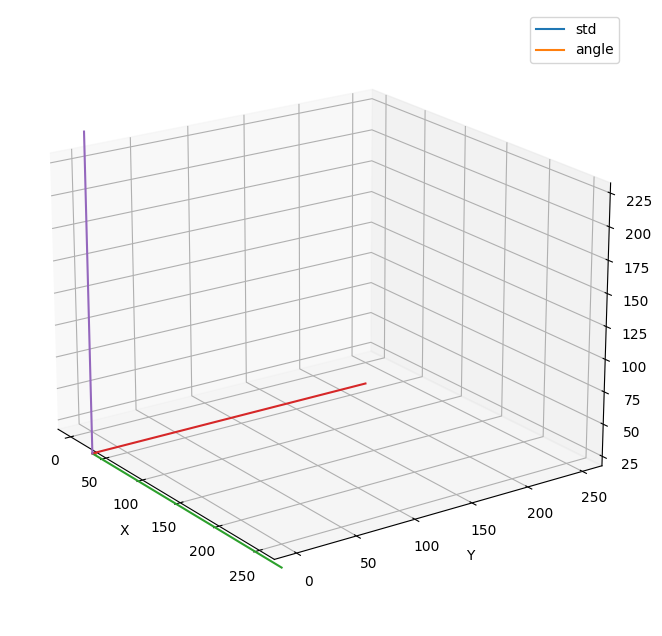

In [21]:
ax = plt.figure(figsize=(12,8)).add_subplot(projection='3d',)
#ax = plt.figure(figsize=(10,10)).add_subplot()



# Start dots
ax.plot(x1,y1,z1,label="std")

ax.plot(x2,y2,z2,label = "angle")
ax.plot([0,250],[0,0],[0,0])
ax.plot([0,0],[0,250],[0,0])
ax.plot([0,0],[0,0],[0,250])

ax.set_xlim([-100,300])
ax.set_ylim(-100,300)
ax.legend()
ax.axis('equal')
ax.set_xlabel('X')
ax.set_ylabel('Y')
#ax.set_zlabel('Z')
ax.view_init(elev=20., azim=-35, roll=0)

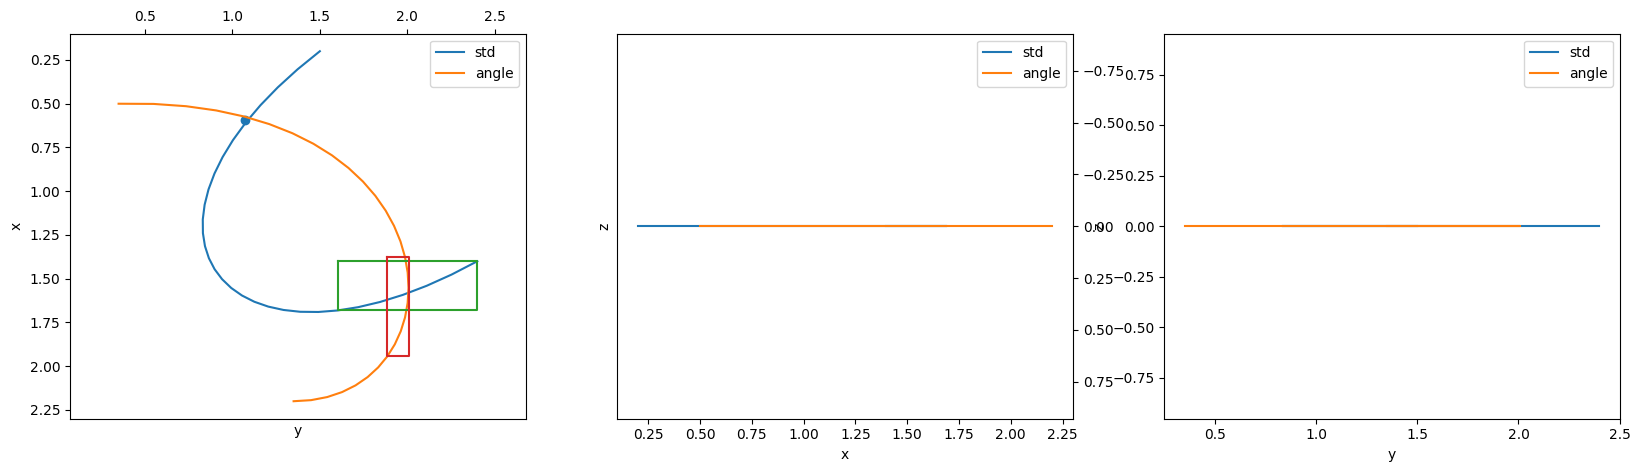

In [22]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].plot(y1,x1, label="std")
ax[0].plot(y2,x2, label="angle")

(0.606198, 1.07829, 0)
(0.575169, 1.06238, 0)



ax[1].plot(x1,z1, label="std")
ax[1].plot(x2,z2, label="angle")
ax[1].yaxis.tick_right()
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')
ax[1].invert_yaxis()
ax[1].axis('equal')
ax[1].legend()

ax[2].plot(y1,z1, label="std")
ax[2].plot(y2,z2, label="angle")
ax[2].set_xlabel('y')
ax[2].set_ylabel('z')
ax[2].axis('equal')
ax[2].legend()

index = 5
ax[0].plot(make_box(boxes1[index])[1], make_box(boxes1[index])[0])
ax[0].plot(make_box(boxes2[index])[1], make_box(boxes2[index])[0])
ax[0].scatter([1.07299], [0.59571])
ax[0].xaxis.tick_top()
ax[0].set_xlabel('y')
ax[0].set_ylabel('x')
ax[0].invert_yaxis()
ax[0].axis('equal')
ax[0].legend()

In [23]:
t =  (-0.512216210, 0.189091876)
a1 = (0.595733404, 1.08613336)
b1 = (0.0959332585, -0.0715501308)
a2 = (0.567585230, 1.04570377)
b2 = (0.0409795642, 0.142259121)

def yx1(t0):
    a10 = a1[0]
    a11 = a1[1]
    b10 = b1[0]
    b11 = b1[1]
    return (a10 + t0 * b10,a11 + t0 * b11)

def yx2(t0):
    a10 = a2[0]
    a11 = a2[1]
    b10 = b2[0]
    b11 = b2[1]
    return (a10 + t0 * b10,a11 + t0 * b11)

def line333(index):
    return ([rlines[index][0], rlines[index+1][0]], [rlines[index][1], rlines[index+1][1]])

In [24]:
xl1 = [
    yx1(0)[0],yx1(1)[0],
]
yl1 = [
    yx1(0)[1],yx1(1)[1],
]
xl2 = [
    yx2(0)[0],yx2(1)[0],
]
yl2 = [
    yx2(0)[1],yx2(1)[1],    
]

In [25]:
make_box(boxes1[1])[0]
boxes1[0]

((0.2, 0.831092, 0), (1.69, 2.4, 0))

In [26]:
xy2[3]

(0.538341, 0.907587, 0)

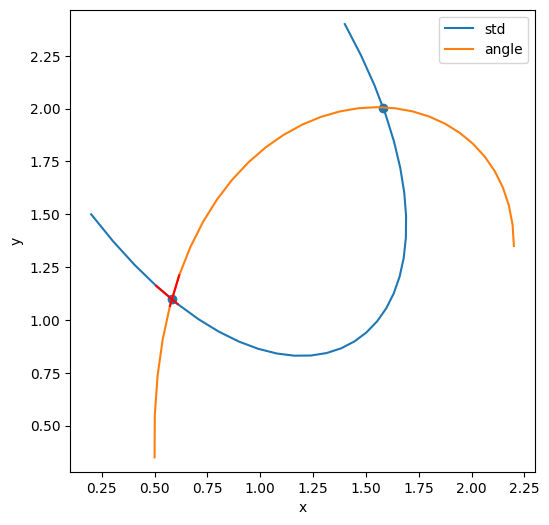

In [27]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x1,y1, label="std")
ax.plot(x2,y2, label="angle")

index = 0

#ax.plot(make_box2(index, 0)[0], make_box2(index, 0)[1])
#ax.plot(make_box2(index, 1)[0], make_box2(index, 1)[1])
index = 1

#ax.plot(make_box2(index, 0)[0], make_box2(index, 0)[1])
#ax.plot(make_box2(index, 1)[0], make_box2(index, 1)[1])
index = 5

#ax.plot(make_box2(index, 0)[0], make_box2(index, 0)[1])
#ax.plot(make_box2(index, 1)[0], make_box2(index, 1)[1])
i = 0;
# while (True):
#     ax.plot(line333(i)[0], line333(i)[1], color='RED')
#     i += 2;
#     if (i == len(rlines)): break

ind = 3
ax.plot([xy1[ind][0], xy1[ind+1][0]],[xy1[ind][1], xy1[ind+1][1]], color="red")

ind = 4
ax.plot([xy2[ind][0], xy2[ind+1][0]],[xy2[ind][1], xy2[ind+1][1]], color="red")
#0.490698338, 1.17583048, 0.00000000

#0.582391798, 1.09813523,
#1.58057308, 2.00518179,

ax.scatter([0.58239179,1.58057308],[1.09813523,2.00518179])
#ax.scatter([1.58780003,1.53653324],[1.98734987,2.11973333])
#ax.scatter([1.50303149,1.58720005],[2.00529623,2.00600004])
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.plot(xl1, yl1)
#ax.plot(xl2, yl2)
ax.axis('equal')
ax.legend()
#ax.set_ylim([1.0,1.2])
#ax.set_xlim([0.4,0.9])
#ax.set_ylim([1.9,2.2])
#ax.set_xlim([1.4,1.6])

In [28]:
points = [(0,0), (4,4)]
points_r = []
alpha = 20;

for point in points:
    # if ((point[0] == 0)and(point[1] == 0)):
        
    #     points_r.append((point[0], point[1]))
    #     continue
    
    r = np.sqrt(point[0]**2 + point[1]**2)
    
    angle = np.deg2rad(30)#np.arcsin(point[0] / r)
    print(r)
    
    new_x = point[0] * np.cos(angle) - point[1] * np.sin(angle)
    new_y = point[0] * np.sin(angle) + point[1] * np.cos(angle)

    points_r.append((new_x, new_y)) 


def get_x(po):
    x = []
    for i in po:
        x.append(i[0])
    return x
        
def get_y(po):
    y = []
    for i in po:
        y.append(i[1])
    return y    
    

0.0
5.656854249492381


In [29]:
points_r

[(0.0, 0.0), (1.464101615137755, 5.464101615137754)]

In [30]:
def get_p(p):
    x = []
    y = []
    for i in p:
        x.append(i[0])
        y.append(i[1])
    return (x,y)

In [32]:
class Vector3D:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

def subtract_vectors(v1, v2):
    return Vector3D(v1.x - v2.x, v1.y - v2.y, v1.z - v2.z)

def cross_product(v1, v2):
    return Vector3D(v1.y * v2.z - v1.z * v2.y, v1.z * v2.x - v1.x * v2.z, v1.x * v2.y - v1.y * v2.x)

class Line:
    def __init__(self, point, direction):
        self.point = point
        self.direction = direction

def find_line_intersection(line1, line2):
    delta = subtract_vectors(line2.point, line1.point)

    cross_product1 = cross_product(line1.direction, line2.direction)
    cross_product2 = cross_product(line1.direction, delta)
    cross_product3 = cross_product(line2.direction, delta)

    denominator = cross_product1.x * line2.direction.x + cross_product1.y * line2.direction.y + cross_product1.z * line2.direction.z

    if abs(denominator) < 1e-10:
        # Линии почти параллельны
        print('fsdf')
        return None

    t = -(cross_product2.x * line2.direction.x + cross_product2.y * line2.direction.y + cross_product2.z * line2.direction.z) / denominator

    intersection_point = Vector3D(line1.point.x + t * line1.direction.x, line1.point.y + t * line1.direction.y, line1.point.z + t * line1.direction.z)
    return intersection_point

# Пример использования
point1 = Vector3D(1.0, 2.0, 3.0)
point2 = Vector3D(4.0, 5.0, 6.0)
direction1 = subtract_vectors(point2, point1)

point3 = Vector3D(7.0, 8.0, 9.0)
point4 = Vector3D(10.0, 11.0, 12.0)
direction2 = subtract_vectors(point4, point3)

line1 = Line(point1, direction1)
line2 = Line(point3, direction2)

intersection_point = find_line_intersection(line1, line2)

fsdf


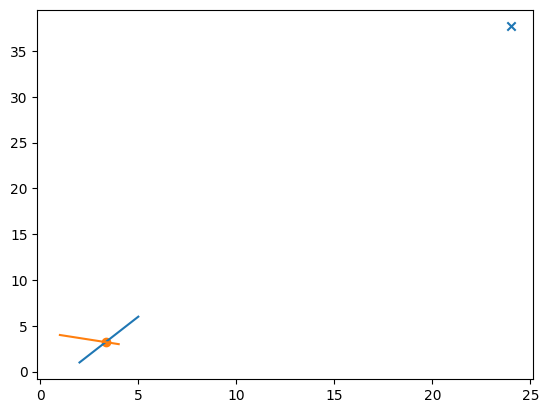

In [33]:
fig, ax = plt.subplots()
ax.plot(get_p(p1p)[0], get_p(p1p)[1])
ax.plot(get_p(p2p)[0], get_p(p2p)[1])
ax.scatter(a1[0] + b1[0] * t1, a1[1] + b1[1] * t1,marker='x')
ax.scatter(a2[0] + b2[0] * t2, a2[1] + b2[1] * t2)

In [34]:
def generate_circle_points(center_x, center_y, radius, num_points=100):
    theta = np.linspace(0, 2 * np.pi, num_points)
    x = center_x + radius * np.cos(theta)
    y = center_y + radius * np.sin(theta)
    return x, y
    

In [42]:
xyz_std = [
    (0, 150, 0), (70.3754, 321.472, 0), (143.498, 465.809, 0), (219.25, 586.318, 0), (297.498, 686.053, 0), (378.096, 767.814, 0), (460.885, 834.146, 0), (545.692, 887.339, 0), (632.33, 929.429, 0), (720.6, 962.198, 0), (810.286, 987.172, 0), (901.163, 1005.62, 0), (992.988, 1018.57, 0), (1085.51, 1026.78, 0), (1178.45, 1030.76, 0), (1271.55, 1030.76, 0), (1364.49, 1026.78, 0), (1456.97, 1018.57, 0), (1548.67, 1005.62, 0), (1639.25, 987.172, 0), (1728.37, 962.198, 0), (1815.65, 929.429, 0), (1900.73, 887.339, 0), (1983.21, 834.146, 0), (2062.69, 767.814, 0), (2138.75, 686.053, 0), (2210.97, 586.318, 0), (2278.89, 465.809, 0), (2342.06, 321.473, 0), (2400, 150, 0),
]
xyz_less = [
    (0, 150, 0), (93.3535, 272.146, 0), (184.549, 376.834, 0), (273.846, 465.852, 0), (361.49, 540.862, 0), (447.71, 603.398, 0), (532.717, 654.871, 0), (616.708, 696.565, 0), (699.863, 729.639, 0), (782.346, 755.127, 0), (864.305, 773.935, 0), (945.87, 786.845, 0), (1027.16, 794.514, 0), (1108.27, 797.472, 0), (1189.28, 796.123, 0), (1270.26, 790.748, 0), (1351.27, 781.5, 0), (1432.33, 768.406, 0), (1513.47, 751.37, 0), (1594.69, 730.166, 0), (1675.97, 704.448, 0), (1757.28, 673.739, 0), (1838.57, 637.439, 0), (1919.8, 594.824, 0), (2000.86, 545.04, 0), (2081.68, 487.111, 0), (2162.14, 419.934, 0), (2242.11, 342.28, 0), (2321.45, 252.795, 0), (2400, 150, 0)
]
xyz_h = [
    (-50, 100, 0), (-50, 200, 0), (50, 200, 0), (50, 100, 0), (450, 1450, 0), (450, 1550, 0), (550, 1550, 0), (550, 1450, 0), (1150, 650, 0), (1150, 750, 0), (1250, 750, 0), (1250, 650, 0), (1950, 1450, 0), (1950, 1550, 0), (2050, 1550, 0), (2050, 1450, 0), (2350, 100, 0), (2350, 200, 0), (2450, 200, 0), (2450, 100, 0)
]
xyz_dp = [
    (0, 150, 0), (500, 1500, 0), (1200, 700, 0), (2000, 1500, 0), (2400, 150, 0),
]

xyz_p = [
    ( 0.400000006, 0.250000000, 0.00000000),
( 0.400000006, 0.449999988, 0.00000000),
( 0.600000024, 0.449999988, 0.00000000),
( 0.600000024, 0.250000000, 0.00000000),
( 0.349999994, 2.25000000, 0.00000000 ),
( 0.349999994, 2.44999981, 0.00000000 ),
( 0.550000012, 2.44999981, 0.00000000 ),
( 0.550000012, 2.25000000, 0.00000000 ),
( 2.10000014, 2.25000000, 0.00000000),
( 2.10000014, 2.44999981, 0.00000000),
( 2.29999995, 2.44999981, 0.00000000),
( 2.29999995, 2.25000000, 0.00000000),
( 2.10000014, 1.25000000, 0.00000000),
( 2.10000014, 1.45000005, 0.00000000),
( 2.29999995, 1.45000005, 0.00000000),
( 2.29999995, 1.25000000, 0.00000000),

]


In [43]:
def get_xyz(xyz):
    x = []
    y = []
    z = []
    
    for i in xyz:
        x.append(i[0])
        y.append(i[1])
        z.append(i[2])
    return (x, y, z)

(-284.9207054253517, 2684.9962240678738, -234.9801751086353, 1634.999055957554)

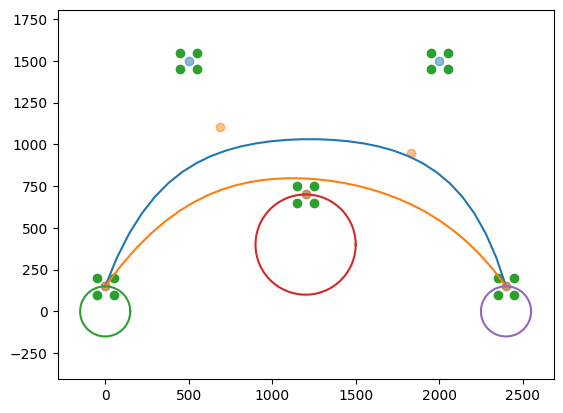

In [44]:
fig, ax = plt.subplots()
ax.plot(get_xyz(xyz_std)[0], get_xyz(xyz_std)[1])
ax.plot(get_xyz(xyz_less)[0], get_xyz(xyz_less)[1])
ax.plot(generate_circle_points(0,0, 150)[0], generate_circle_points(0,0,150)[1])
ax.plot(generate_circle_points(1200,400, 300)[0], generate_circle_points(400,400, 300)[1])
ax.plot(generate_circle_points(2400,0, 150)[0], generate_circle_points(2400,0,150)[1])
dfpoints = [
    (0, 0+150, 0), 
    
    (500, 1500, 0.0),
    
    (1200, 400+300,0.0), 
    
    (2000, 1500, 0.0),
    
    (2400, 0+150,0.0)
]

# +		[1]	-0.185297221, 0.396615624, 0.00000000	glm::vec<3,float,0>
# +		[3]	0.166206986, 0.552677631, 0.00000000	glm::vec<3,float,0>

dfpoints_less = [
    (0, 0+150, 0), 
    
    (685.297241, 1103.38440, 0.00000000),

    
    (1200, 400+300,0.0), 
    
    (1833.79297, 947.322388, 0.00000000),
    
    (2400, 0+150,0.0)
]
ax.scatter(get_xyz(dfpoints)[0], get_xyz(dfpoints)[1], alpha=0.5)
ax.scatter(get_xyz(dfpoints_less)[0], get_xyz(dfpoints_less)[1], alpha=0.5)
ax.scatter(get_xyz(xyz_h)[0], get_xyz(xyz_h)[1])
ax.axis('equal')
#ax.plot(get_p(p2p)[0], get_p(p2p)[1])

(0.25249999619999997, 2.3974999478, 0.1400000095, 2.5599998005)

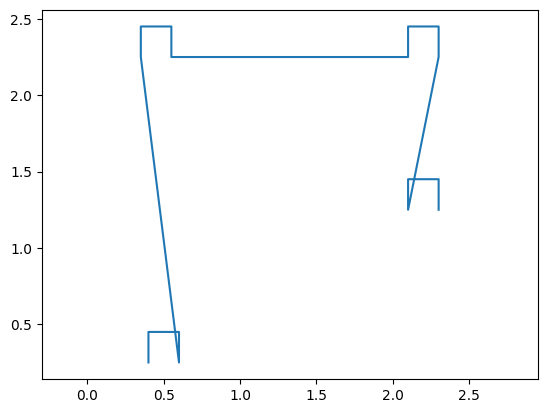

In [46]:
fig, ax = plt.subplots()
ax.plot(get_xyz(xyz_p)[0], get_xyz(xyz_p)[1])
ax.axis('equal')